In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


C:\Users\jvvil\AppData\Local\Temp\ipykernel_1996\1155860540.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['date'] = pd.to_datetime(selected_columns_df['date'])


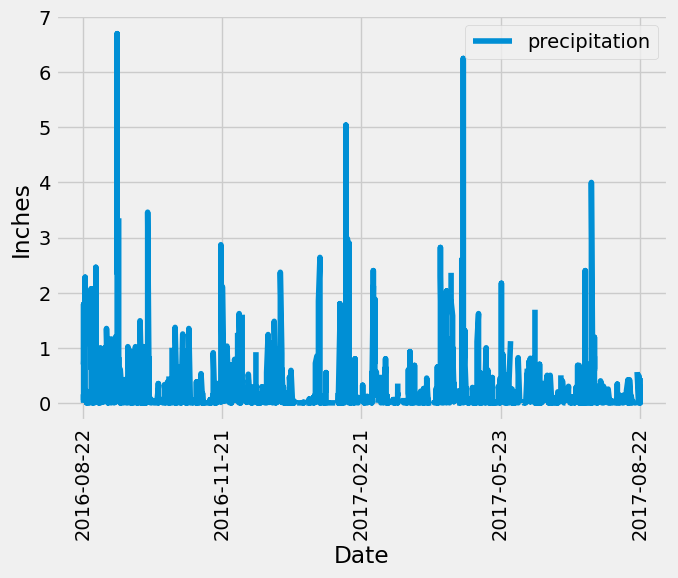

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# past12_months_data = session.query(measurement).filter(measurement.date >= func.date('2017-08-23', '-12 months')).all()
past12_months_data = session.query(measurement).filter(measurement.date >= '2016-08-23').order_by(measurement.date).all()

data = [row.__dict__ for row in past12_months_data]


# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
df = pd.DataFrame(data)

sorted_df = df.sort_values(by='date', ascending=True)

selected_columns_df = sorted_df[['date', 'prcp']]

selected_columns_df['date'] = pd.to_datetime(selected_columns_df['date'])

# Use Pandas Plotting with Matplotlib to plot the data
# Calculate the number of x-ticks
num_ticks = 5
start_date = selected_columns_df['date'].min()
end_date = selected_columns_df['date'].max()

start_timestamp = start_date.timestamp()
end_timestamp = end_date.timestamp()

# Generate evenly spaced x-ticks in Unix timestamps
x_ticks_timestamp = np.linspace(start_timestamp, end_timestamp, num_ticks)

# Convert Unix timestamps back to datetime objects
x_ticks = [pd.Timestamp.fromtimestamp(ts) for ts in x_ticks_timestamp]

# Plot the data
plt.figure(figsize=(7, 6))
plt.plot(selected_columns_df['date'], selected_columns_df['prcp'])

# Set the x-ticks to the evenly spaced values
plt.xticks(x_ticks)

plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(["precipitation"])
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show();

# XPert Learning Assistant was used to review my entire code for this input cell in order to properly generate the output cell (bar chart) below.
# Module 5 was used as a reference in generating the code for the data visualization.

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
selected_columns_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.name).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

sel = [measurement.station, func.count(measurement.station)]
most_active = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

most_active_data = session.query(*sel).filter(measurement.station == "USC00519281").all()
most_active_data

most_active_df = pd.DataFrame(most_active_data, columns=['Station', 'Min Temp', 'Max Temp', 'Avg Temp'])
most_active_df


,Station,Min Temp,Max Temp,Avg Temp
0,USC00519281,54.0,85.0,71.663781


In [19]:
# Here, I am retrieving the most recent date for the most active station
recent = session.query(measurement.date).filter(measurement.station == 'USC00519281').order_by(measurement.date.desc()).first()
recent

('2017-08-18',)

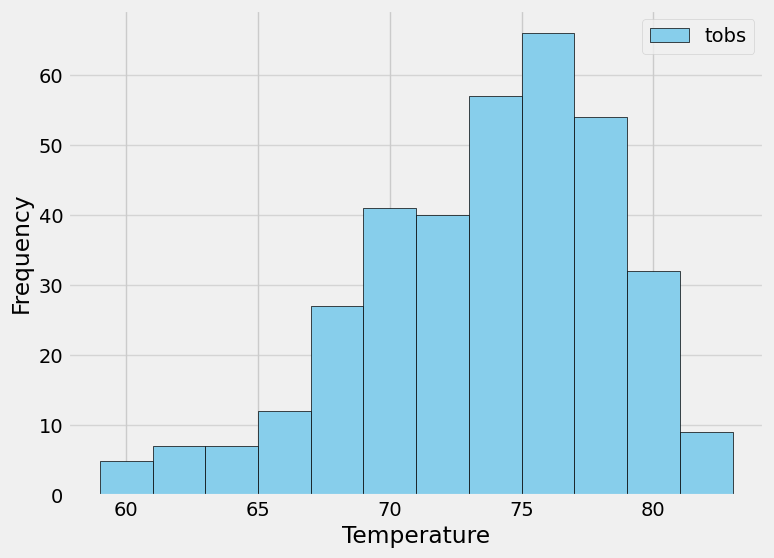

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


mostactive_12months = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-18').all()
mostactive_12months

temperatures = [result[0] for result in mostactive_12months]

# Create a histogram plot
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, color='skyblue', edgecolor='black', label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend(loc='best')
plt.show();

# Xpert Learning Assistant was used to review and correct my code for this input cell to properly show the output cell below.
# Module 5 was used as a reference in generating the code for the data visualization.

# Close Session

In [16]:
# Close Session
session.close()